# Usando el perceptrón simple para clasificación multiclase
**Hernández Montellano Carlos**

**Redes Neuronales**

**1002-A**


## Introducción  

Una red neuronal arficial son modelos basados en las redes neuronales biológicas. Esta red consiste la conexión de neuronas artificiales las cuales están ordenadas por capas. Cada neurona recibe una serie de valores y genera un valor de acuerdo a una función matemática. La salida final del proceso de clasificación es una etiqueta que representa una clase a la que la muestras pertenece.

Las redes neuronales se pueden entrenar para que reconozcan patrones en una serie de datos y éstas clasifiquen las muestras con una etiqueta de acuerdo a un entrenamiento previo.

<img src="red_neuronal2.png">

### Perceptrón  

El perceptrón consta sólo de la capa de entrada. Si se tienen n entradas, entonces se tendrán n neuronas en la capa de entrada. Su función de activación es una función escalónn. Este tipo de red neuronal discrimina clases de forma lineal y sólo puede clasificar dos clases.

<img src="perceptron.png" width="400" height="600">

Para calcular la salida de la red antes de la función de activación, se realiza un producto punto entre el vector de datos de entrada y el vector de pesos.

$$ z = w_1 x_1 + w_2 x_2 +, ..., + w_m x_m + b = \sum_{i=1}^{m} w_i x_i + b $$

Una vez calculado el valor de $z$, se utiliza una función escalón como función de etiquetado $g(z)$ para para el proceso de clasificación, teniendo una respuesta en el intervalo $[-1, 1]$.

$$ g(z) = \left \{ \begin{matrix} 1 & \mbox{si }\mbox{ z $\geq$ 0}
\\ -1& \mbox{ en otro caso}\end{matrix}\right. $$

#### Algoritmo de entrenamiento  


El perceptrón es entrenado en iteraciónes. En cada iteración se actualizan los pesos y el bias. El error es calculado con la respuesta del perceptrón después de aplicar el etiquetado de las muestras. Las fórmulas para las actualizaciones son las siguientes:

$$ W = W + n ( Y - d ) \cdot X $$
$$ b = b + n ( Y - d ) $$

Donde:  
$W$: Vector de pesos  
$b$: Bias  
$n$: Factor de aprendizaje  
$Y$: Vector de clases objetivo  
$d$: Respuesta de la red neuronal después del etiquetado.  
$X$: Vector de datos de entrada.  

![200](perceptron.png "Title")

### Adaline  

Adaline es muy parecido al perceptrón ya que realiza una clasificación lineal y binaria. También el cálculo de la clasificación y la función de activación es similar. La diferencia fundamental se encuentra en el algoritmo de entrenamiento.

#### Algoritmo de entrenamiento  


Al igual que el Perceptrón, la red Adaline utiliza la salida para calcular el error, pero la diferencia está en que Adaline utiliza el valor continuo antes de la función de activación, es decir, se utiliza el valor $z$ en lugar de $g({z})$ al calcular el error $(Y - d)$, donde $Y$ es el vector objetivo y $d$ es la respuesta de la red antes de etiquetar.

<img src="ada.png">


## Aplicación del Perceptrón para clasificación Multiclase

### Cargando bibliotecas

In [95]:
#Biblioteca de funciones matemáticas (álgebra lineal, números aleatorios, etc).
import numpy as np

#Se cargan los clasificadores
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import Adaline
from mlxtend.classifier import Perceptron

#MinMaxScaler
import sklearn.preprocessing as prep

#Matriz de confusión
from sklearn.metrics import confusion_matrix

#Biblioteca para graficar
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap # Lista de colores

**Cargar en X,Y, los datos del conjunto MNIST**  

Cada vector de la matriz Xi tiene la información que representa un dígito numérico. Cuando se realiza un reshape a un vector para que este se transforme a una matriz de 28x28, entonces se puede describir una imagen que contiene uno de los 10 dígitos. Las clases están divididas cada 500 renglones de X, es decir, en los primeros 500 renglones se tienen representaciones de 0's, en los siguientes 500 se tienen representaciones de 1's, y así sucesivamente hasta el dígito 9. El vector Y contiene las clases a las que pertenece cada renglon de la matriz X.

In [96]:

from mlxtend.data import mnist_data #Subconjunto del conjunto original
[X, Y] = mnist_data()
#Se obtiene la cantidad de renglones y de columnas de la matriz de datos
[renX, colX] = X.shape
[renX, colX]

[5000, 784]

### Mostrando algunos ejemplos

In [97]:
#Función para realizar el plot de los dígitos
def plotDigits (plotData, labelData, ren, col, otherLabel=[]):
    #Se crea la instancia del plot
    fig, axs = plt.subplots(ren, col)
    fig.suptitle('Digitos')
    img = []
    #Se agregan los subplots a la figura final
    for i in range(ren):
        for j in range(col):
            img.append(axs[i, j].imshow(plotData[i * col + j],))
            if (otherLabel==[]):
                axs[i, j].set_title('Etq=' + str(labelData[i * col + j]))
            else:
                axs[i, j].set_title('Etq=' + str(labelData[i * col + j]) + ' Resp=' + str(otherLabel[i * col + j]))
    #tamaño
    plt.rcParams["figure.figsize"] = (10,6)
    #espacio entre gráficas
    plt.subplots_adjust(wspace = 1.5)

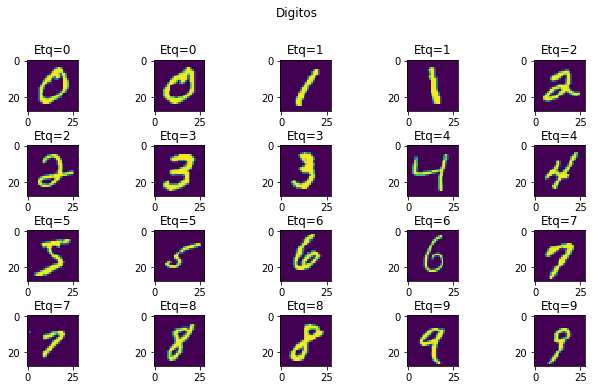

In [118]:
pltData = np.zeros((20, 28, 28)) #Datos de los primeros 2 digitos cada 500 renglones
etqData = np.zeros(20, dtype=int) #Datos del target de los primeros 2 digitos cada 500 renglones
#Se obtienen los primeros 2 digitos cada 500 renglones del dataset
for i in range(10):
    index1 = i*500
    index2 = i*500 + 1
    pltData[i*2]     = X[index1].reshape(28, 28)
    pltData[i*2 + 1] = X[index2].reshape(28, 28)
    etqData[i*2]     = Y[index1] 
    etqData[i*2 + 1] = Y[index2]

plotDigits(pltData, etqData, 4, 5)

### Normalización de los datos

In [99]:
#Se crea un objeto del preprocessing de la biblioteca sklearn
#En este caso se utilizará un MinMaxScaler
minMax = prep.MinMaxScaler(feature_range=(0, 1), copy=True)

**Guardar los valores transformados en Xs** (Xs =X scaled)

In [100]:
Xs = minMax.fit_transform(X)

### Preparación de los targets para cada dígito

In [101]:
Y_m = np.zeros((10, X.shape[0]), dtype=int)
Y_m[0] = np.where(Y == 0, 1, 0)
Y_m[1] = np.where(Y == 1, 1, 0)
Y_m[2] = np.where(Y == 2, 1, 0)
Y_m[3] = np.where(Y == 3, 1, 0)
Y_m[4] = np.where(Y == 4, 1, 0)
Y_m[5] = np.where(Y == 5, 1, 0)
Y_m[6] = np.where(Y == 6, 1, 0)
Y_m[7] = np.where(Y == 7, 1, 0)
Y_m[8] = np.where(Y == 8, 1, 0)
Y_m[9] = np.where(Y == 9, 1, 0)

print(Y_m.shape)
print(Y_m[0, 490:510])
print(Y_m[1, 490:510])

(10, 5000)
[1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


### Uso de la biblioteca perceptron para clasificar el conjunto de datos

In [102]:
for i in range(0,10):
    per = Perceptron(eta=0.1, epochs=10, random_seed=1, print_progress=3)
    print("Entrenamiento del dígito ", i)
    per.fit(Xs, Y_m[i])
    print("Score = ",per.score(Xs, Y_m[i]), "\n")



Entrenamiento del dígito  0


Iteration: 1/10 | Cost 122.00 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9884 

Entrenamiento del dígito  1


Iteration: 10/10 | Cost 41.00 | Elapsed: 0:00:01 | ETA: 0:00:000

Score =  0.9948 

Entrenamiento del dígito  2


Iteration: 10/10 | Cost 151.00 | Elapsed: 0:00:01 | ETA: 0:00:000

Score =  0.9784 

Entrenamiento del dígito  3


Iteration: 1/10 | Cost 255.00 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.975 

Entrenamiento del dígito  4


Iteration: 1/10 | Cost 360.00 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9862 

Entrenamiento del dígito  5


Iteration: 1/10 | Cost 164.00 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9764 

Entrenamiento del dígito  6


Iteration: 1/10 | Cost 192.00 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9926 

Entrenamiento del dígito  7


Iteration: 1/10 | Cost 466.00 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.974 

Entrenamiento del dígito  8


Iteration: 1/10 | Cost 380.00 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9578 

Entrenamiento del dígito  9


Iteration: 10/10 | Cost 218.00 | Elapsed: 0:00:01 | ETA: 0:00:000

Score =  0.9654 



## implementación propia del perceptrón

### Arreglo de pesos para los perceptrones

In [103]:
W_m = np.random.uniform(low=-0.5, high=0.5, size=[10, Xs.shape[1]])
W_m[0, :10]

array([ 0.34350262, -0.15346392, -0.12656732, -0.24028762,  0.45139447,
       -0.23173174,  0.34185047,  0.35669899,  0.24731733, -0.20471778])

### Función signo

In [104]:
def signo(x):
    if (x >= 0):
        return 1.
    else:
        return -1.

### Definición del objeto perceptrón

In [105]:
class PerceptronImpl:
    def __init__(self, aprendizaje=0.1, it=50):
        self.aprendizaje = aprendizaje
        self.it = it
    #Para cambiar los pesos W en cada iteración se utiliza la siguiente fórmula
    #W = W + n * (Y[indice] - respuestaActual)*vector características
    #W = W + deltaW
    
    def respuestaRed(self, X, W):
        return signo(self.respuestaZ(X, W))
    
    def respuestaZ(self, X, W):
        return np.dot(X, W) + self.bias
    
    def entrenamiento(self, X, Y, W):
        #Inicialización y copias locales. W se recibe como referencia, así que
        #se va a modificar la matriz de pesos externa en el proceso de entrenamiento
        self.target = np.where(Y == 1, 1., -1.)
        self.bias = 0.0
        [rowX, colX] = X.shape
        self.error = np.zeros(self.it)
        for i in range(0, self.it):
            #Calcular la respuesta del clasificador con los pesos actuales.
            for index in range(0, rowX):
                #Calcular la respuesta de la red con los pesos actuales.
                resp = self.respuestaRed(X[index], W)
                #Calcular el error a utilizar para cada peso.
                deltaW = self.aprendizaje * (self.target[index] - resp)
                #Actualizar pesos
                W += deltaW * X[index]
                #Actualizar bias [b = deltaW]
                self.bias += deltaW
            #Se acumula la cantidad de muestras mal clasificadas después de la iteración.
            for index in range(0, rowX):
                self.error[i] += int(self.respuestaRed(X[index], W) != self.target[index])
    
    def accuracy(self, X, Y, W):
        acc = 0
        for index in range(0, X.shape[0]):
            acc += int(self.respuestaRed(X[index], W) == self.target[index])
        return acc/X.shape[0]
    
    def predict(self, X, W):
        pred = np.zeros(X.shape[0])
        for index in range(0, X.shape[0]):
            #Se pasa el número de etiquetado de [-1, 1] a [0, 1]
            if (self.respuestaRed(X[index], W) == 1):
                pred[index] = 1
            else:
                pred[index] = 0
        return pred
            

### Entrenamiento

In [106]:
#forma del conjunto para entrenamiento
Xs.shape

(5000, 784)

In [107]:
# se muestra cómo se va entrenando cada dígito
iteraciones = 50
per = PerceptronImpl(aprendizaje=0.0001, it=iteraciones)
predict = np.zeros((10, 5000))
error_vect = np.zeros((10,iteraciones))

# Durante el entrenamiento, mostrar la mejora en rendimiento de clasificación (accuracy)
for i in range(0, 10):
    print("Entrenamiento de dígito", i, "con", iteraciones, "iteraciones")
    per.entrenamiento(Xs, Y_m[i], W_m[i])
    #Convertir las etiquetas de clasificación al rango [0, 9]
    pred = per.predict(Xs, W_m[i])
    for index in range(0, Xs.shape[0]):
        predict[i][index] = per.respuestaZ(Xs[index], W_m[i])
    error_vect[i] = per.error
    print("Cantidad de errores por iteracion:\n", per.error[:50])
    print("Accuracy=", per.accuracy(Xs, Y_m[i], W_m[i]), "\n")

Entrenamiento de dígito 0 con 50 iteraciones
Cantidad de errores por iteracion:
 [611. 546. 471. 413. 367. 335. 302. 280. 263. 247. 234. 225. 216. 207.
 199. 193. 180. 174. 172. 167. 165. 162. 158. 154. 150. 147. 144. 144.
 140. 140. 137. 135. 132. 128. 127. 127. 127. 125. 123. 121. 122. 120.
 118. 118. 118. 116. 115. 116. 115. 114.]
Accuracy= 0.9772 

Entrenamiento de dígito 1 con 50 iteraciones
Cantidad de errores por iteracion:
 [571. 476. 396. 323. 285. 247. 230. 209. 186. 180. 171. 160. 151. 145.
 140. 136. 132. 126. 125. 121. 114. 112. 108. 107. 105. 103. 102. 102.
 100.  96.  96.  94.  94.  93.  90.  88.  87.  86.  86.  87.  86.  85.
  85.  82.  81.  81.  80.  81.  81.  81.]
Accuracy= 0.9838 

Entrenamiento de dígito 2 con 50 iteraciones
Cantidad de errores por iteracion:
 [672. 647. 604. 552. 499. 447. 420. 399. 374. 358. 350. 338. 327. 317.
 308. 303. 298. 295. 292. 282. 276. 270. 268. 269. 262. 260. 256. 253.
 255. 252. 252. 248. 245. 244. 242. 242. 242. 242. 242. 237. 235. 2

### Gráfica de mejora durante las iteraciones

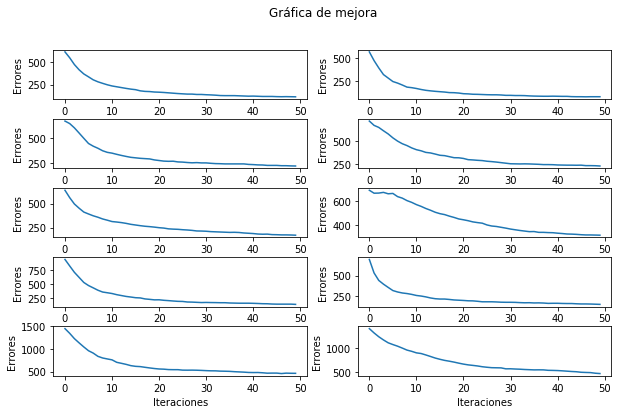

In [108]:
def plotGraph(it, error):
    ren = 5
    col = 2
    
    fig, axs = plt.subplots(ren, col)
    fig.suptitle('Gráfica de mejora')
    
    #Se agregan los subplots a la figura final
    for i in range(ren):
        for j in range(col):
            axs[i, j].plot(np.arange(0,it), error[i * 2 + j], '-')
            axs[i, j].set_xlabel('Iteraciones')
            axs[i, j].set_ylabel('Errores')
    #espacio entre gráficas
    plt.subplots_adjust(hspace = 0.4)
  
    plt.show()
    
plotGraph(iteraciones, error_vect)

### Pruebas de rendimiento de clasificación (predict)

## Resultados

### Matriz de confusion  

La matríz de confusión es una forma de visualizar el rendimiento de un algoritmo de clasificación que utiliza aprendizaje supervisado. Las columnas de esta matriz muestran las predicciones de cada una de las clases y las filas muestran las instancias de la clase objetivo. La ventaja de las matrices de confusión es que se puede observar claramente cómo es la distribución de clasificación de las muestras del predictor con respecto a la clase objetivo.

<img src="matconf.png">

In [109]:
predict_vect = np.zeros(5000)
for i in range(0,5000):
    result = np.where(predict.T[i] == np.amax(predict.T[i]))
    predict_vect[i] = result[0][0] 
predict_vect

confusion_matrix(Y, predict_vect)

array([[462,   0,   3,   3,   1,   7,   7,   3,  11,   3],
       [  0, 460,   4,   5,   1,   5,   1,   3,  18,   3],
       [  7,   8, 387,  13,  14,   5,  12,   8,  38,   8],
       [  1,   1,  12, 387,   0,  42,   4,  10,  28,  15],
       [  2,   3,   5,   1, 401,   4,  11,   9,  16,  48],
       [  8,   4,   2,  21,   5, 354,  12,   3,  64,  27],
       [  7,   2,   3,   0,   2,   3, 462,   2,  16,   3],
       [  2,   2,   5,   4,   7,   2,   0, 403,  13,  62],
       [  1,   4,   6,   8,   4,  11,   5,   5, 432,  24],
       [  5,   2,   4,   9,  10,   3,   1,  17,  11, 438]], dtype=int64)

### Precisión (Accuracy score)  

El accuracy o score es un valor que permite saber la efectividad de clasificación de un algoritmo de aprendizaje. Este valor representa el porcentaje de muestras que fueron clasificadas de forma correcta con respecto al vector objetivo.

In [110]:
#Accuracy
acc = (predict_vect == Y)*1.0
acc = np.count_nonzero(acc==1)/5000
print(acc)

0.8372


## Adaline

In [111]:
for i in range(0, 10):
    ada = Adaline(eta=0.00001, epochs=10, minibatches = 10, random_seed=1, print_progress=3)
    print("Entrenamiento del dígito ", i)
    print(ada.fit(Xs, Y_m[i]))
    print("Score = ",ada.score(Xs, Y_m[i]), "\n")

Iteration: 1/10 | Cost 969.61 | Elapsed: 00:00:00 | ETA: 00:00:00

Entrenamiento del dígito  0


Iteration: 3/10 | Cost 622.54 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9738 

Entrenamiento del dígito  1


Iteration: 3/10 | Cost 827.53 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9608 

Entrenamiento del dígito  2


Iteration: 3/10 | Cost 820.05 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9198 

Entrenamiento del dígito  3


Iteration: 3/10 | Cost 741.61 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9216 

Entrenamiento del dígito  4


Iteration: 2/10 | Cost 885.13 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9202 

Entrenamiento del dígito  5


Iteration: 3/10 | Cost 762.33 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9002 

Entrenamiento del dígito  6


Iteration: 3/10 | Cost 725.36 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.944 

Entrenamiento del dígito  7


Iteration: 3/10 | Cost 1020.68 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9416 

Entrenamiento del dígito  8


Iteration: 3/10 | Cost 887.54 | Elapsed: 00:00:00 | ETA: 00:00:00

Score =  0.9 

Entrenamiento del dígito  9


Iteration: 10/10 | Cost 766.66 | Elapsed: 0:00:00 | ETA: 0:00:000

Score =  0.9 



### Generacion de pesos aleatorios 


In [112]:
W_m = np.random.uniform(low= -0.2, high=0.2, size=[10,colX])

### Definición de la clase AdalineImpl

In [113]:
class AdalineImpl:
    def __init__(self, aprendizaje=0.1, it=50):
        self.aprendizaje = aprendizaje
        self.it = it
    #Para cambiar los pesos W en cada iteración se utiliza la siguiente fórmula
    #W = (X.trans . X)^−1 . X.trans . target 
    
    def respuestaZ(self, X, W):
        return np.dot(X, W) + self.bias
    
    def respuestaRed(self, X, W):
        return signo(self.respuestaZ(X, W))
    
    def entrenamiento(self, X, Y, W):
        #Inicialización y copias locales. W se recibe como referencia, así que
        #se va a modificar la matriz de pesos externa en el proceso de entrenamiento
        self.target = np.where(Y == 1, 1., -1.)
        self.bias = 0.0
        [rowX, colX] = X.shape
        self.XX = X
        self.error = np.zeros(self.it)
        indexPool = np.arange(100)
        np.random.shuffle(indexPool)
        for it in range(0, self.it):
            #Calcular la respuesta del clasificador con los pesos actuales.
            for index in range(0, rowX):
                #Calcular la respuesta de la red con los pesos actuales.
                resp = self.respuestaZ(X[index], W)
                #Calcular el error
                error = self.target[index] - resp
                #Actualizar pesos
                W += self.aprendizaje * error * X[index]
                #Actualizar bias [b = b + aprendizaje * error]
                self.bias += self.aprendizaje * error
            #Se acumula la cantidad de muestras mal clasificadas después de la iteración.
            for index in range(0, rowX):
                self.error[it] += int(self.respuestaRed(X[index], W) != self.target[index])

    def accuracy(self, X, Y, W):
        acc = 0
        for index in range(0, X.shape[0]):
            acc += int(self.respuestaRed(X[index], W) == self.target[index])
        return acc/X.shape[0]
    
    def predict(self, X, W):
        pred = np.zeros(X.shape[0])
        for index in range(0, X.shape[0]):
            #Se pasa el número de etiquetado de [-1, 1] a [0, 1]
            if (self.respuestaRed(X[index], W) == 1):
                pred[index] = 1
            else:
                pred[index] = 0
        return pred
            

#### Entrenamiento

In [114]:
# Durante el entrenamiento, mostrar la mejora en rendimiento de clasificación (accuracy)
iteraciones = 50
# se muestra cómo se va entrenando cada dígito
ada = AdalineImpl(aprendizaje=0.00001, it=iteraciones)
predict = np.zeros((10, 5000))
error_vect = np.zeros((10,iteraciones))
# Durante el entrenamiento, mostrar la mejora en rendimiento de clasificación (accuracy)
for i in range(0, 10):
    print("Entrenamiento de dígito", i , "con", iteraciones, "iteraciones")
    ada.entrenamiento(Xs, Y_m[i], W_m[i])
    #Convertir las etiquetas de clasificación al rango [0, 9]
    pred = ada.predict(Xs, W_m[i])
    for index in range(0, Xs.shape[0]):
        predict[i][index] = per.respuestaZ(Xs[index], W_m[i])
    error_vect[i] = ada.error
    print("Errores por iteración:\n", ada.error)
    print("Accuracy = ", ada.accuracy(Xs, Y_m[i], W_m[i]), "\n")

Entrenamiento de dígito 0 con 50 iteraciones
Errores por iteración:
 [1062.  764.  706.  656.  622.  591.  568.  529.  506.  478.  455.  439.
  413.  396.  381.  371.  364.  356.  346.  336.  326.  322.  317.  307.
  300.  291.  289.  283.  282.  276.  275.  272.  267.  265.  261.  261.
  259.  254.  252.  252.  247.  244.  239.  238.  236.  236.  230.  229.
  225.  219.]
Accuracy =  0.9562 

Entrenamiento de dígito 1 con 50 iteraciones
Errores por iteración:
 [1104.  961.  869.  795.  761.  726.  692.  657.  634.  615.  586.  567.
  533.  513.  490.  472.  457.  432.  418.  400.  387.  378.  369.  362.
  347.  335.  327.  316.  304.  300.  300.  292.  286.  284.  277.  275.
  273.  269.  269.  259.  254.  252.  250.  249.  247.  246.  246.  246.
  245.  239.]
Accuracy =  0.9522 

Entrenamiento de dígito 2 con 50 iteraciones
Errores por iteración:
 [1309.  923.  836.  800.  771.  750.  725.  706.  694.  673.  655.  635.
  623.  608.  604.  590.  576.  572.  556.  542.  533.  523.  521.

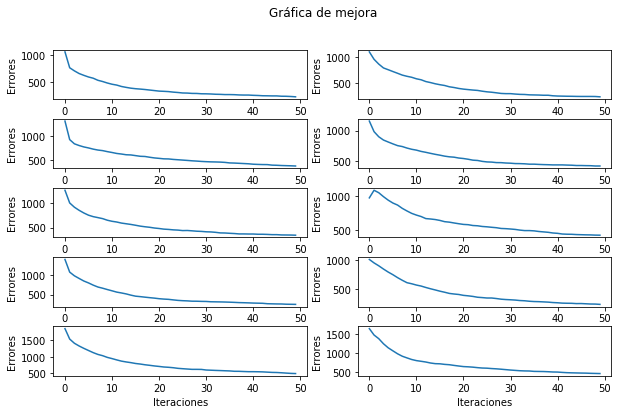

In [115]:
#Se muestran las gráficas de mejora
plotGraph(iteraciones, error_vect)

### Pruebas de rendimiento

In [116]:
#Matriz de confusión
predict_vect = np.zeros(5000)
for i in range(0,5000):
    result = np.where(predict.T[i] == np.amax(predict.T[i]))
    predict_vect[i] = result[0][0] 
predict_vect
confusion_matrix(Y, predict_vect)

array([[425,   0,   6,   8,   3,  12,  17,   5,  15,   9],
       [  1, 420,  17,  16,   0,   1,   9,   0,  26,  10],
       [ 17,  24, 288,  31,  17,   5,  41,  19,  49,   9],
       [ 13,  11,  22, 336,   5,  17,  16,  12,  46,  22],
       [  6,  12,  11,  10, 304,   5,  13,  10,  40,  89],
       [ 28,  12,  13,  53,  29, 207,  33,   7,  86,  32],
       [ 10,  12,   9,   1,   8,  10, 422,   3,  17,   8],
       [ 10,  22,   9,   7,  24,   1,   2, 338,  12,  75],
       [  7,  22,  13,  24,   9,  17,  12,   7, 355,  34],
       [ 11,   4,  13,  13,  16,   1,   5,  15,  37, 385]], dtype=int64)

### Precisión (Accuracy score)

In [117]:
#Accuracy
acc = (predict_vect == Y)*1.0
acc = np.count_nonzero(acc==1)/5000
print(acc)

0.696


## Conclusiones

Esta práctica fue de gran valor didáctico para poder comprender el funcionamiento de las redes neuronales básicas. En este caso se experimentó con el Perceptrón y el Adaline.

Utilizando diferentes ajustes se pueden obtener diferentes resultados, también influye mucho la cantidad de iteraciones que se le den a las redes durante el entrenamiento. En los resultados se puede observar que el Perceptrón tiene mejores resultados utilizando la misma cantidad de iteraciones.

Las matrices de confusión muestran la dispersión de la clasificación de cada una de las redes. En un principio el perceptrón tenia un sesgo de fallo hacia el número 9, pero esto se corrigió utilizando un menor factor de aprendizaje.

Las mejoras más notables ocurrian en un rango de iteraciones desde la 1 hasta la 20, de ahí la mejora no era demasiado grande.

Cuando hay muchos elementos de una clase y pocos de otra, se crea un sesgo de error de fallo hacia la clase con más elementos.

En conclusión, esta práctica fue de gran ayuda para comprender más a fondo el funcionamiento de las redes neuronales. Realizar la implementación resolvió muchas dudas que se tenóan respecto a los conceptos vistos en clase y en la teoría.